# NLP Answers

- **Answer Set**: No. 04
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [16]:
import warnings

import math as math
import hazm as hazm

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import sklearn.svm as sksvm
import sklearn.tree as sktree
import sklearn.ensemble as skensemble
import sklearn.decomposition as skdecompose

import sklearn.base as skbase
import sklearn.utils as skutils
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection
import sklearn.feature_extraction.text as sktext

warnings.filterwarnings("ignore", category=UserWarning)
sk.set_config(display="diagram")

### Dataset

Now we will load `Persica` corpus and split it into `TestSet` and `TrainSet`:

In [17]:
corpus = hazm.PersicaReader(csv_file="../lib/persica.csv")

data_frame = pd.DataFrame(corpus.docs())
data_frame = skutils.shuffle(data_frame)

data_features = data_frame.filter(["text"], axis=1).to_numpy().flatten()
data_labels = data_frame.filter(["category2"], axis=1).to_numpy().flatten()

data_labels = skprocessing.LabelEncoder().fit(data_labels).transform(data_labels)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.2, 
    random_state=313
)

data_frame

,id,title,text,date,time,category,category2
8005,133683,اخبار هنري دانشگاه‌ها,به همت انجمن موسيقي كانون ادب و هنر دانشگاه عل...,138/1//03,1:3::58,فرهنگ و هنر-,فرهنگي
8856,486600,نماينده‌ي شاكيان هموفيلي: دستور تامين اعتبار ض...,احمد قويدل در گفت‌وگو با خبرنگار حقوقي خبرگزار...,138/3//11,1:3::41,فقه و حقوق-حقوق اجتماعي-,فقه و حقوق
3678,471728,مديرعامل شركت شهر سالم خبر داد: احداث درمانگاه...,مديرعامل شركت شهر سالم اعتقاد دارد: ‌با مشترك ...,138/3//10,1:2::17,بهداشت و درمان-عمومي-,بهداشتي
7337,632795,دومين جشنواره‌ي دانشجويي شعر رضوي با معرفي برگ...,به گزارش خبرنگار خبرگزاري دانشجويان ايران (ايس...,138/4//09,1:5::04,فرهنگ و ادب-ادبيات-,فرهنگي
10382,573416,بگيريستين از آمادگي كامل بارسلونا در فصل جديد ...,به گزارش خبرگزاري دانشجويان ايران (ايسنا)، سه‌...,138/4//06,1:1::20,ورزشي-فوتبال-,ورزشي
...,...,...,...,...,...,...,...
4658,403527,/بازخواني حادثه‌ي كوي دانشگاه تهران/‌٨/ سخنان ...,به گزارش خبرگزاري دانشجويان ايران(ايسنا) متن ك...,138/3//04,1:7::04,تاريخ-,تاريخي
10094,878294,مربي تيم كشتي صنايع همدان: از تمام نفرات اصلي ...,تورج ظفري، مربي تيم صنايع همدان در رابطه با عم...,138/5//11,1:0::56,ورزشي-كشتي-,ورزشي
5148,707525,دكتر محسن رهامي درگفت‌وگوي تفصيلي باايسنا: *جر...,درآستانه سالروز ترور شهيد مرتضي مطهري توسط گرو...,138/5//02,1:4::26,تاريخ-,تاريخي
6717,223971,/پژوهش - صنعت / رفتار لرزه‌يي پانل‌هاي ساندويچ...,به گزارش سرويس پژوهش خبرگزاري دانشجويان ايران ...,138/2//02,1:1::46,پژوهشي-,علمي


### Analysis

Now, we will analyse `DataSet`, `TrainSet`, `TestSet` and will find these parameters:

- **Sentence Count**: Number of sentences
- **Word Count**: Number of words
- **Unique Word Count**: Number of unique words
- **Average Word/Sentence**: Average number of words per sentence

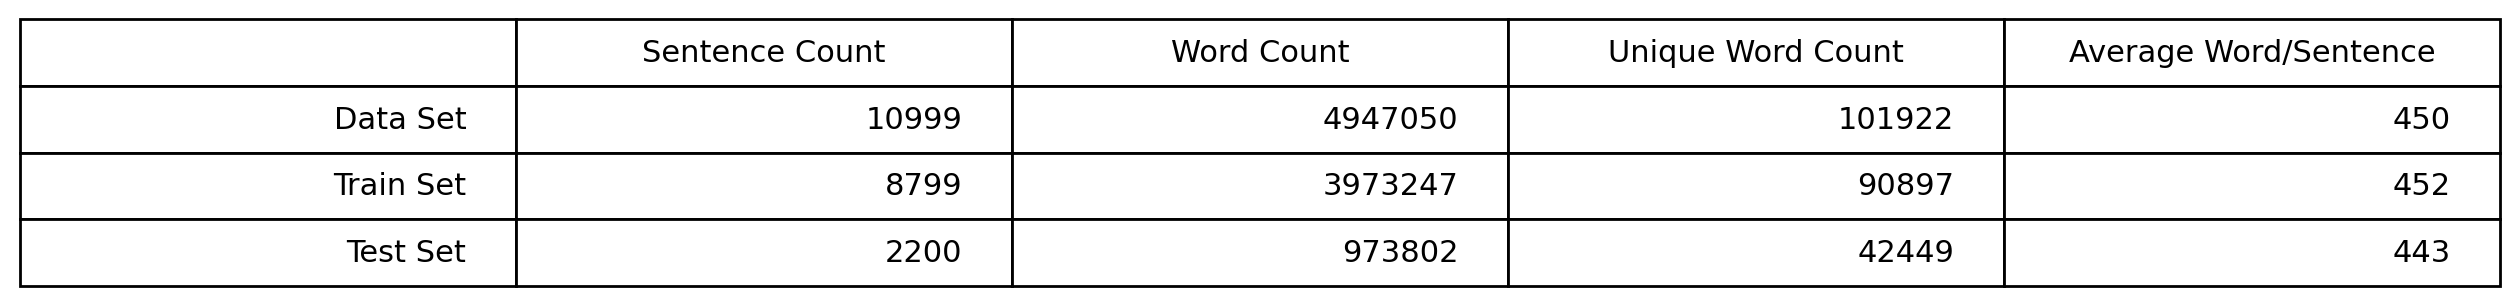

In [18]:
data_words = hazm.word_tokenize('. '.join(data_features))
train_words = hazm.word_tokenize('. '.join(train_features))
test_words = hazm.word_tokenize('. '.join(test_features))

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Data Set",
        len(data_features),
        len(data_words),
        len(set(data_words)),
        round(len(data_words) / len(data_features))
    ],
    [
        "Train Set",
        len(train_features),
        len(train_words),
        len(set(train_words)),
        round(len(train_words) / len(train_features))
    ],
    [
        "Test Set",
        len(test_features),
        len(test_words),
        len(set(test_words)),
        round(len(test_words) / len(test_features))
    ]
], colLabels=["", "Sentence Count", "Word Count", "Unique Word Count", "Average Word/Sentence"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---

## Problem

Before the begin, we will use `CountVectorizer` inorder to find count vector of `ngrams` for each document, then we will use `TfidfTransformer` inorder to compute `TF-IDF` vectors for each document.

We will use **hazm** library inorder to apply these preprocessing steps:

- **Stemmer**
- **Normalizer**
- **Lemmatizer**
- **Stop Words Removal**

Then we will fit two types of predictor models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

In [19]:
stemmer = hazm.Stemmer()
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()
stop_words = hazm.stopwords_list("../lib/PersianStopWords.txt")

def tokernizer(sentence):
    return [
        lemmatizer.lemmatize(normalizer.normalize(stemmer.stem(word)))
        for word in hazm.word_tokenize(sentence)
        if word not in stop_words
    ]

### SVM

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **SVM** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [20]:
svm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("decomposer", skdecompose.TruncatedSVD()),
        ("classifier", sksvm.SVC())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 1)],
        "decomposer__n_components": [500],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

svm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('decomposer', TruncatedSVD()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'decomposer__n_components': [500],
                         'vectorizer__ngram_range': [(1, 1)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x000001FAE36D2430>]},
             scoring='accuracy')

### Decision Tree

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Decision Tree** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [21]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("decomposer", skdecompose.TruncatedSVD()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 1)],
        "decomposer__n_components": [500],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('decomposer', TruncatedSVD()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decomposer__n_components': [500],
                         'vectorizer__ngram_range': [(1, 1)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x000001FAE36D2430>]},
             scoring='accuracy')

### Random Forest

In this section, we will define a pipeline that first will **Vectorize** documents, then it will use **Random Forest** model to classify records

We will use a **Grid Search** with **Cross Validation** inorder to find the best parameters

In [22]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("vectorizer", sktext.CountVectorizer()),
        ("transformer", sktext.TfidfTransformer()),
        ("decomposer", skdecompose.TruncatedSVD()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "vectorizer__tokenizer": [tokernizer],
        "vectorizer__ngram_range": [(1, 1)],
        "decomposer__n_components": [500],
        # "classifier__criterion": ["gini", "entropy"],
        # "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('transformer', TfidfTransformer()),
                                       ('decomposer', TruncatedSVD()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'decomposer__n_components': [500],
                         'vectorizer__ngram_range': [(1, 1)],
                         'vectorizer__tokenizer': [<function tokernizer at 0x000001FAE36D2430>]},
             scoring='accuracy')

### Results

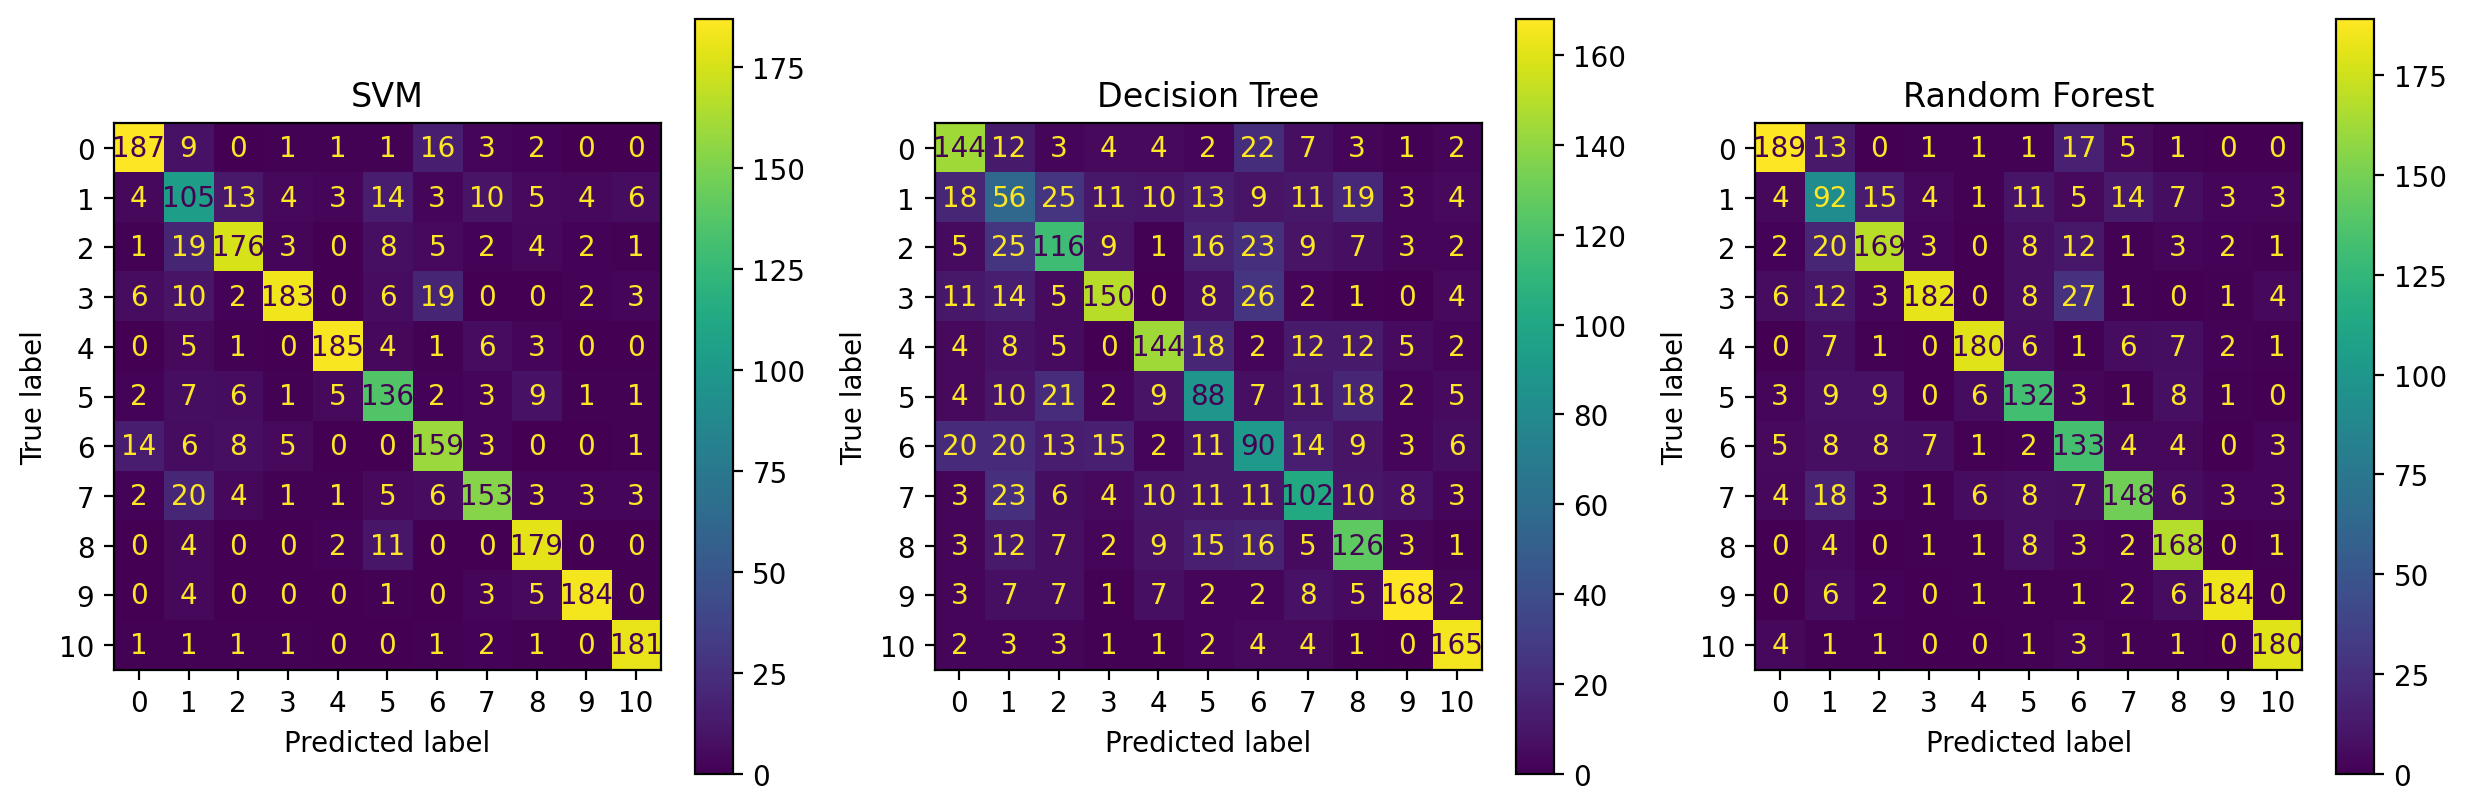

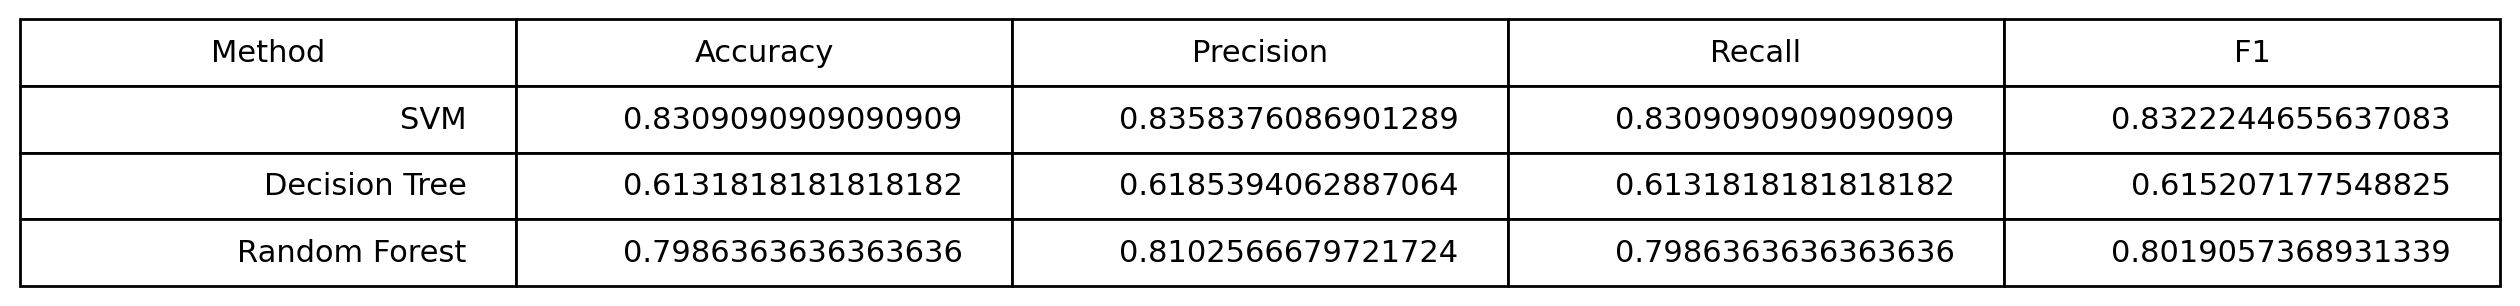

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
axes = axes.flatten()

axes[0].set_title("SVM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[2]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "SVM",
        skmetrics.accuracy_score(svm_predicts, test_labels),
        skmetrics.precision_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(svm_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(svm_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Decision Tree",
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted", zero_division=True)
    ],
    [
        "Random Forest",
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted", zero_division=True),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted", zero_division=True)
    ],
], colLabels=["Method", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

---